## Read gene expression and clinical data files

In [1]:
import pandas as pd
import os
import importlib
# import clean_gene_name  # import the module first
# importlib.reload(clean_gene_name)  # reload the module
# gene_name import clean_gene_name  # re-import the updated function

# Load expression_df
path = ('/Users/atanugiri/.cache/kagglehub/datasets/mahdiehhajian/'
'gene-expression-in-gastric-cancer/versions/1')

# Full file path
file_path = os.path.join(path, 'expression profile(8863 genes).csv')

# Read the CSV and set first column as index
expression_df = pd.read_csv(file_path, index_col=0)

# Preview
print(expression_df.head(2))
print(expression_df.shape)


# Load clinical_df
file_path = 'tcga_gdc_clinical_data.tsv'
columns_to_use = ['Sample ID', 'Diagnosis Age', 'Disease Free (Months)', 
                 'Disease Free Status', 'Fraction Genome Altered', 'ICD-10 Classification',
                 'Mutation Count', 'Overall Survival (Months)', 'Overall Survival Status',
                 'AJCC Pathologic M-Stage', 'AJCC Pathologic N-Stage', 'AJCC Pathologic Stage',
                 'AJCC Pathologic T-Stage', 'Race Category', 'Sex']
# Read the file with tab separator and selected columns
clinical_df = pd.read_csv(file_path, sep='\t', usecols=columns_to_use)

# Convert status to numeric
status_map = {'0:LIVING': 0, '1:DECEASED': 1}
clinical_df["Overall Survival Status"] = clinical_df["Overall Survival Status"].map(status_map)

# Preview the data
print(clinical_df.head(n=2))
print(clinical_df.shape)

       TCGA-BR-4279-01  TCGA-VQ-A94T-01  TCGA-BR-8589-01  TCGA-BR-A4IV-01  \
A1CF           10.4647           6.6146          10.4016           4.6554   
A2ML1           0.0000           4.3985           2.4817           1.3475   

       TCGA-VQ-A8E2-01  TCGA-BR-8297-01  TCGA-D7-A4YY-01  TCGA-BR-4280-01  \
A1CF            9.8054           4.7419           5.1548          10.5675   
A2ML1           3.4159           2.4948           6.3345           0.0000   

       TCGA-D7-A74A-01  TCGA-F1-6177-01  ...  GTEX-QV44-1226-SM-4R1KE  \
A1CF            9.4567          10.7863  ...                   5.7464   
A2ML1           6.7217           0.0000  ...                   3.5820   

       GTEX-13PVQ-2126-SM-5L3FW  GTEX-SNMC-0626-SM-4DM6H  \
A1CF                     3.5094                   5.3059   
A2ML1                    3.3348                   4.4367   

       GTEX-WZTO-2126-SM-4PQYW  GTEX-Q2AH-1126-SM-48TZM  \
A1CF                    3.2506                   5.4593   
A2ML1            

In [2]:
# Step 1: Clean and align patient IDs
expression_df.columns = expression_df.columns.str.strip().str.upper()
clinical_df["Sample ID"] = clinical_df["Sample ID"].str.strip().str.upper()

# Step 2: Find common samples
common_samples = expression_df.columns.intersection(clinical_df["Sample ID"])
print(common_samples)
print(len(common_samples))

# Step 3: Subset both datasets to common patients
expression_df = expression_df[common_samples]
clinical_df = clinical_df[clinical_df["Sample ID"].isin(common_samples)]

# Step 4: Reorder clinical_df to match column order of expression_df
clinical_df = clinical_df.set_index("Sample ID").loc[common_samples].reset_index()

# Step 5: Rename "index" back to "Sample ID"
clinical_df.rename(columns={"index": "Sample ID"}, inplace=True)

print(f"expression_df shape: {expression_df.shape}")
print(f"expression_df shape: {clinical_df.shape}")

Index(['TCGA-BR-4279-01', 'TCGA-VQ-A94T-01', 'TCGA-BR-8589-01',
       'TCGA-BR-A4IV-01', 'TCGA-VQ-A8E2-01', 'TCGA-BR-8297-01',
       'TCGA-D7-A4YY-01', 'TCGA-BR-4280-01', 'TCGA-D7-A74A-01',
       'TCGA-F1-6177-01',
       ...
       'TCGA-VQ-A92D-01', 'TCGA-HU-A4H0-01', 'TCGA-RD-A7BW-01',
       'TCGA-BR-8686-01', 'TCGA-BR-4256-01', 'TCGA-D7-8576-01',
       'TCGA-VQ-A8DT-01', 'TCGA-BR-4363-01', 'TCGA-CD-A486-01',
       'TCGA-HU-A4G6-01'],
      dtype='object', length=413)
413
expression_df shape: (8863, 413)
expression_df shape: (413, 15)


In [3]:
assert all(expression_df.columns == clinical_df["Sample ID"])
print("Expression data and clinical metadata are aligned!")

Expression data and clinical metadata are aligned!


## Find overlapping genes among gastric cancer, hypercholesterolemia, and obesity datasets

### hypercholesterolemia genes

In [4]:
# chol_file = ('/Users/atanugiri/Downloads/gastric cancer data analysis/'
# 'Hypercholesterolemia_gene_links_updated_final.xlsx')

# df_chol = pd.read_excel(chol_file, skiprows=2)

# # Extract genes from specified locations
# genes_part1 = df_chol.iloc[0:27, 1]
# genes_part2 = df_chol.iloc[28:82, 0]
# genes_part3 = df_chol.iloc[83:178, 0]

# # Concatenate all parts into a single list
# chol_genes = pd.concat([genes_part1, genes_part2, genes_part3]).dropna().tolist()

# chol_genes = [clean_gene_name(g) for g in chol_genes]
# print(chol_genes)

### Obesity genes

In [5]:
# obesity_file = ('/Users/atanugiri/Downloads/gastric cancer data analysis/'
# 'obesity_gene_links_updated_final.xlsx')

# df_obesity = pd.read_excel(obesity_file)

# print(df_obesity.head(2))

# obesity_genes = df_obesity["Gene Name"].dropna().tolist()
# obesity_genes = [clean_gene_name(g) for g in obesity_genes]
# print(obesity_genes)

### Common genes

In [6]:
# gc_genes = df_sorted.index
# gc_genes = [clean_gene_name(g) for g in gc_genes]

# common_genes_gc_chol = set(chol_genes) & set(gc_genes)
# print(f"{len(common_genes_gc_chol)} common GC and Chol genes found:\n{common_genes_gc_chol}")
# print("\n")

# common_genes_gc_ob = set(obesity_genes) & set(gc_genes)
# print(f"{len(common_genes_gc_ob)} common GC and Obesity genes found:\n{common_genes_gc_ob}")
# print("\n")

# common_genes_gc_chol_ob = set(gc_genes) & set(chol_genes) & set(obesity_genes)
# print(f"{len(common_genes_gc_chol_ob)} common GC and Chol and Obesity genes found:\n{common_genes_gc_chol_ob}")

## Order genes by expression

In [7]:
gene_variance = expression_df.var(axis=1).sort_values(ascending=False)
top_genes = gene_variance.head(20).index
top_genes

Index(['LIPF', 'PGA3', 'XIST', 'GKN1', 'PGA4', 'RPS4Y1', 'MAGEA3', 'PGC',
       'DAZ1', 'MAGEA6', 'BPIFB1', 'DDX3Y', 'GKN2', 'OLFM4', 'KDM5D',
       'RP11-205M5.3', 'MUC5AC', 'CTD-2369P2.12', 'MUC6', 'FABP1'],
      dtype='object')

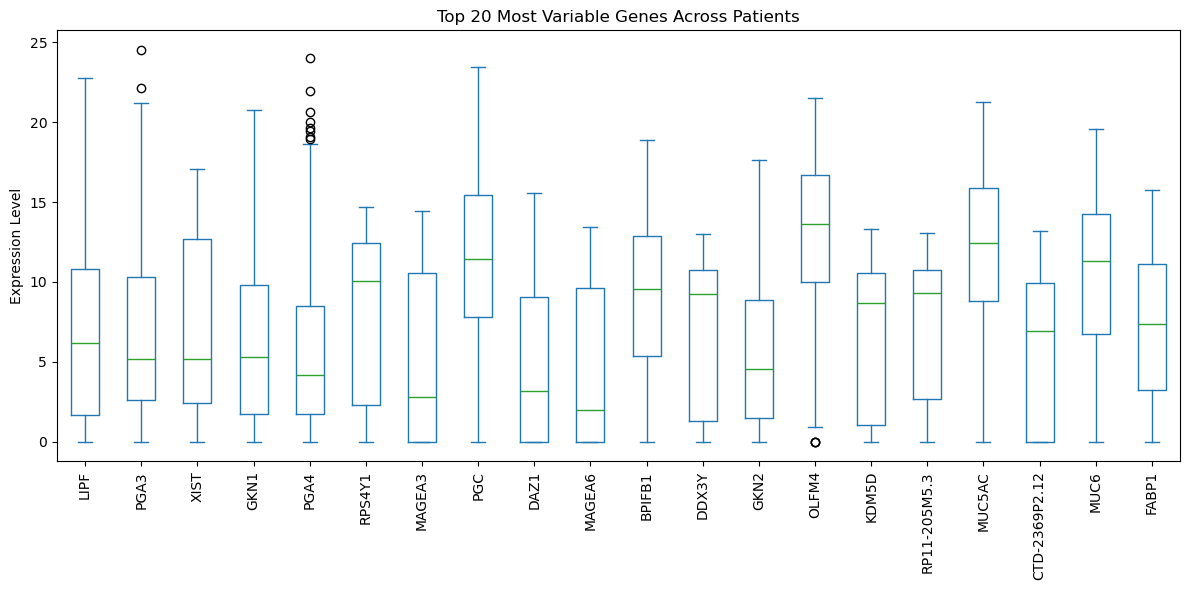

In [8]:
import matplotlib.pyplot as plt

# Transpose to shape: (patients, genes)
expression_df.loc[top_genes].T.plot(kind='box', figsize=(12, 6))

plt.title("Top 20 Most Variable Genes Across Patients")
plt.ylabel("Expression Level")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### CD36 rank by expression

In [9]:
# Get variance ranking of CD36
cd36_variance = expression_df.var(axis=1).loc["CD36"]
rank = expression_df.var(axis=1).rank(ascending=False).loc["CD36"]
print(f"CD36 variance: {cd36_variance:.4f}, Rank: {int(rank)} out of {expression_df.shape[0]}")

CD36 variance: 2.3162, Rank: 3870 out of 8863


## Survival status analysis

### CD36 expression by survival status

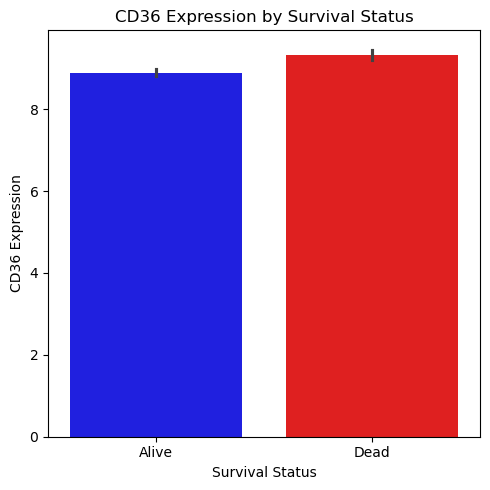

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add CD36 expression to clinical data
cd36_expr = expression_df.loc["CD36"]
plot_df = clinical_df.copy()
plot_df["CD36 Expression"] = cd36_expr.values

# Drop rows with missing values
plot_df = plot_df.dropna(subset=["CD36 Expression", "Overall Survival Status", "Sex"])

# Define palette
palette = {0.0: "blue", 1.0: "red"}

plt.figure(figsize=(5, 5))
sns.barplot(
    x="Overall Survival Status",
    y="CD36 Expression",
    hue="Overall Survival Status",
    data=plot_df,
    palette=palette,
    errorbar="se",
    dodge=False,
    legend=False
)

plt.xlabel("Survival Status")
plt.ylabel("CD36 Expression")
plt.title("CD36 Expression by Survival Status")

# Replace x-tick values 0.0 and 1.0 with labels
plt.xticks([0, 1], ["Alive", "Dead"])

plt.tight_layout()
plt.savefig("CD36_expression_by_survival_bar.png", dpi=300, bbox_inches="tight")
plt.savefig("CD36_expression_by_survival_bar.pdf", bbox_inches="tight")
plt.show()

In [11]:
from scipy.stats import ttest_ind

alive_vals = plot_df[plot_df["Overall Survival Status"] == 0]["CD36 Expression"]
dead_vals = plot_df[plot_df["Overall Survival Status"] == 1]["CD36 Expression"]

t_stat, p_val = ttest_ind(alive_vals, dead_vals, equal_var=False)
print(f"CD36 Expression: t = {t_stat:.3f}, p = {p_val:.4f}")

CD36 Expression: t = -2.743, p = 0.0064


## Survival months analysis 

Split into High vs. Low Expression

In [12]:
# Calculate median expression
threshold = expression_df.loc["CD36"].median()

# Add group label to clinical_df
clinical_df["CD36_Group"] = [
    "High" if val >= threshold else "Low" 
    for val in expression_df.loc["CD36"]
]

Visualize Survival Months by CD36 Group

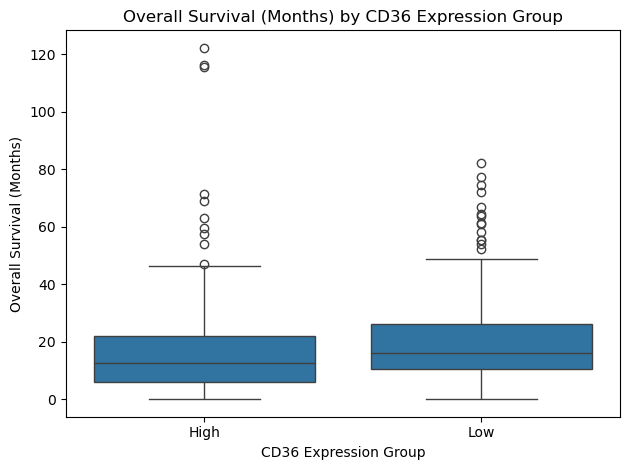

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="CD36_Group", y="Overall Survival (Months)", data=clinical_df)
plt.title("Overall Survival (Months) by CD36 Expression Group")
plt.ylabel("Overall Survival (Months)")
plt.xlabel("CD36 Expression Group")
plt.tight_layout()
plt.show()

Statistical Test: t-test Between Groups

In [14]:
from scipy.stats import ttest_ind

group_high = clinical_df[clinical_df["CD36_Group"] == "High"]["Overall Survival (Months)"]
group_low = clinical_df[clinical_df["CD36_Group"] == "Low"]["Overall Survival (Months)"]

# Drop NaNs
group_high = group_high.dropna()
group_low = group_low.dropna()

t_stat, p_val = ttest_ind(group_high, group_low, equal_var=False)
print(f"Survival comparison by CD36: t = {t_stat:.3f}, p = {p_val:.4f}")

Survival comparison by CD36: t = -1.684, p = 0.0929


### KM survival curve by CD36 expression

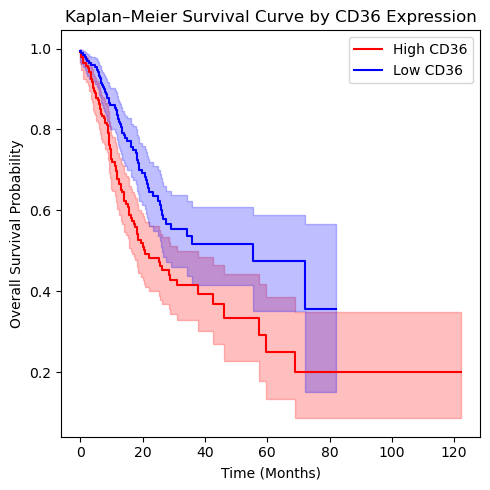

In [15]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Prepare data
km_df = clinical_df[["Overall Survival (Months)", "Overall Survival Status", "CD36_Group"]].dropna()

# Initialize KM fitter
kmf = KaplanMeierFitter()

# Set group-specific colors
group_colors = {"High": "red", "Low": "blue"}

# Plot
plt.figure(figsize=(5, 5))

for group in ["High", "Low"]:
    mask = km_df["CD36_Group"] == group
    kmf.fit(
        durations=km_df[mask]["Overall Survival (Months)"],
        event_observed=km_df[mask]["Overall Survival Status"],
        label=f"{group} CD36"
    )
    kmf.plot_survival_function(ci_show=True, color=group_colors[group])

plt.title("Kaplan–Meier Survival Curve by CD36 Expression")
plt.xlabel("Time (Months)")
plt.ylabel("Overall Survival Probability")
plt.tight_layout()

# Save the figure
plt.savefig("KM_CD36_survival_curve.png", dpi=300, bbox_inches="tight")
plt.savefig("KM_CD36_survival_curve.pdf", bbox_inches="tight")
plt.show()

In [19]:
print(cph.confidence_intervals_.columns)

Index(['95% lower-bound', '95% upper-bound'], dtype='object')


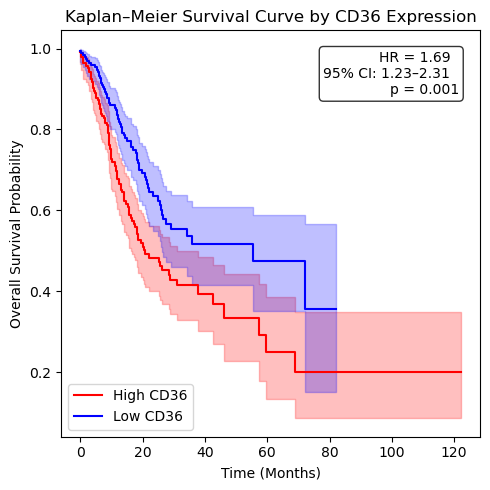

In [23]:
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt

# 1. Prepare data
km_df = clinical_df[["Overall Survival (Months)", "Overall Survival Status", "CD36_Group"]].dropna()
# Binary encode CD36_Group: High=1, Low=0
km_df["CD36_High"] = (km_df["CD36_Group"] == "High").astype(int)

# 2. Fit Cox model
cph = CoxPHFitter()
cph.fit(
    km_df,
    duration_col="Overall Survival (Months)",
    event_col="Overall Survival Status",
    formula="CD36_High"
)

# Extract HR, CI and p-value
hr = cph.hazard_ratios_["CD36_High"]
import numpy as np

log_ci = cph.confidence_intervals_.loc["CD36_High"]
ci_lower = np.exp(log_ci["95% lower-bound"])
ci_upper = np.exp(log_ci["95% upper-bound"])

p_value = cph.summary.loc["CD36_High", "p"]

# 3. Plot KM curves
kmf = KaplanMeierFitter()
group_colors = {"High": "red", "Low": "blue"}

plt.figure(figsize=(5, 5))
ax = plt.gca()

for group in ["High", "Low"]:
    mask = km_df["CD36_Group"] == group
    kmf.fit(
        durations=km_df[mask]["Overall Survival (Months)"],
        event_observed=km_df[mask]["Overall Survival Status"],
        label=f"{group} CD36"
    )
    kmf.plot_survival_function(ci_show=True, color=group_colors[group], ax=ax)

# 4. Annotate HR on the plot
hr_text = (
    f"HR = {hr:.2f}  \n"
    f"95% CI: {ci_lower:.2f}–{ci_upper:.2f}  \n"
    f"p = {p_value:.3f}"
)
# Place the text in the upper right corner of the axes
ax.text(
    0.95, 0.95, hr_text,
    transform=ax.transAxes,
    ha="right", va="top",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
)

plt.title("Kaplan–Meier Survival Curve by CD36 Expression")
plt.xlabel("Time (Months)")
plt.ylabel("Overall Survival Probability")
plt.tight_layout()

# Save and show
plt.savefig("KM_CD36_with_HR.png", dpi=300, bbox_inches="tight")
plt.savefig("KM_CD36_with_HR.pdf", bbox_inches="tight")
plt.show()


In [22]:
print(cph.summary.loc["CD36_High", ["exp(coef)", "p"]])

exp(coef)    1.689539
p            0.001047
Name: CD36_High, dtype: float64


In [21]:
from lifelines.statistics import logrank_test

# Groups
high = km_df[km_df["CD36_Group"] == "High"]
low = km_df[km_df["CD36_Group"] == "Low"]

# Test
results = logrank_test(
    high["Overall Survival (Months)"], low["Overall Survival (Months)"],
    event_observed_A=high["Overall Survival Status"],
    event_observed_B=low["Overall Survival Status"]
)

print(f"Log-rank test: p = {results.p_value:.4f}")

Log-rank test: p = 0.0009


## Sex effect study

### Compare CD36 Expression Between Male and Female

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette for Sex
sex_palette = {"Male": "blue", "Female": "red"}

# Prepare the plot
plt.figure(figsize=(5, 5))
sns.barplot(
    x="Sex",
    y="CD36 Expression",
    data=plot_df,
    errorbar = "se",
    palette=sex_palette
)

plt.title("CD36 Expression by Sex")
plt.tight_layout()

# Save the figure
plt.savefig("CD36_expression_by_sex.png", dpi=300, bbox_inches="tight")
plt.savefig("CD36_expression_by_sex.pdf", bbox_inches="tight")
plt.show()

In [ ]:
from scipy.stats import ttest_ind

male_vals = plot_df[plot_df["Sex"] == "Male"]["CD36 Expression"]
female_vals = plot_df[plot_df["Sex"] == "Female"]["CD36 Expression"]

t_stat, p_val = ttest_ind(male_vals, female_vals, equal_var=False)
print(f"CD36 Expression by Sex: t = {t_stat:.3f}, p = {p_val:.4f}")


### Compare Survival Months by Sex

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Define custom color palette
sex_palette = {"Male": "blue", "Female": "red"}

# Plot
plt.figure(figsize=(5, 5))
sns.barplot(
    x="Sex",
    y="Overall Survival (Months)",
    data=clinical_df,
    errorbar = "se",
    palette=sex_palette
)

plt.title("Survival Duration by Sex")
plt.tight_layout()

# Save the figure
plt.savefig("survival_by_sex_bar.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_by_sex_bar.pdf", bbox_inches="tight")
plt.show()

# T-test
male_surv = clinical_df[clinical_df["Sex"] == "Male"]["Overall Survival (Months)"].dropna()
female_surv = clinical_df[clinical_df["Sex"] == "Female"]["Overall Survival (Months)"].dropna()

t_stat, p_val = ttest_ind(male_surv, female_surv, equal_var=False)
print(f"Survival by Sex: t = {t_stat:.3f}, p = {p_val:.4f}")


## Race effect study

In [ ]:
print(clinical_df["Race Category"].value_counts(dropna=False))

### Boxplot of CD36 Expression by Race

In [ ]:
# Define races to include
selected_races = ["WHITE", "ASIAN", "BLACK OR AFRICAN AMERICAN"]

# Filter clinical data
filtered_race_df = clinical_df[clinical_df["Race Category"].isin(selected_races)].copy()

# Add CD36 expression
filtered_race_df["CD36 Expression"] = expression_df.loc["CD36", filtered_race_df["Sample ID"]].values


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom race color palette
custom_palette = {
    "WHITE": "#1f77b4",
    "ASIAN": "#2ca02c",
    "BLACK OR AFRICAN AMERICAN": "#d62728"
}

plt.figure(figsize=(5, 5))
ax = sns.barplot(
    x="Race Category",
    y="CD36 Expression",
    data=filtered_race_df,
    errorbar="se",
    palette=custom_palette
)

# Set custom x-tick labels
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["White", "Asian", "Black\nor African\nAmerican"])

plt.title("CD36 Expression by Race")
plt.tight_layout()

# Save
plt.savefig("CD36_expression_by_race.png", dpi=300, bbox_inches="tight")
plt.savefig("CD36_expression_by_race.pdf", bbox_inches="tight")
plt.show()


In [ ]:
from scipy.stats import f_oneway

# Extract values per group
groups = [
    filtered_race_df[filtered_race_df["Race Category"] == race]["CD36 Expression"].dropna()
    for race in selected_races
]

f_stat, p_val = f_oneway(*groups)
print(f"ANOVA: CD36 by Race (WHITE, ASIAN, BLACK): F = {f_stat:.3f}, p = {p_val:.4f}")


## Analysis of cancer type

In [ ]:
cancer_stage = clinical_df["AJCC Pathologic Stage"]
print(cancer_stage.value_counts(dropna=False))

In [ ]:
# Extract Roman numeral (I, II, III, IV)
clinical_df["Stage Group"] = (
    clinical_df["AJCC Pathologic Stage"]
    .str.extract(r"(Stage\s+I{1,3}V?)")[0]
)

In [ ]:
print(clinical_df["Stage Group"].value_counts(dropna=False))

In [ ]:
# Define desired stage order
stage_order = ["Stage I", "Stage II", "Stage III", "Stage IV"]

# Convert to ordered category
clinical_df["Stage Group"] = pd.Categorical(
    clinical_df["Stage Group"],
    categories=stage_order,
    ordered=True
)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette for the 4 stages
stage_palette = {
    "Stage I": "lightgreen",
    "Stage II": "skyblue",
    "Stage III": "orange",
    "Stage IV": "red"
}

# Prepare data
stage_plot_df = clinical_df[clinical_df["Stage Group"].notna()].copy()
stage_plot_df["CD36 Expression"] = expression_df.loc["CD36", stage_plot_df["Sample ID"]].values

# Plot
plt.figure(figsize=(5, 5))
sns.barplot(
    x="Stage Group",
    y="CD36 Expression",
    data=stage_plot_df,
    errorbar="se",
    palette=stage_palette
)

plt.title("CD36 Expression by Cancer Stage")
plt.tight_layout()

# Save the figure
plt.savefig("CD36_expression_by_stage.png", dpi=300, bbox_inches="tight")
plt.savefig("CD36_expression_by_stage.pdf", bbox_inches="tight")
plt.show()

In [ ]:
from scipy.stats import f_oneway

groups = [
    stage_plot_df[stage_plot_df["Stage Group"] == stage]["CD36 Expression"]
    for stage in sorted(stage_plot_df["Stage Group"].unique())
]

f_stat, p_val = f_oneway(*groups)
print(f"ANOVA: CD36 by Stage Group: F = {f_stat:.3f}, p = {p_val:.4f}")

# Volcano Plot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Create arrays
log2_fc = []
pvals = []

alive_ids = clinical_df[clinical_df["Overall Survival Status"] == 0]["Sample ID"]
dead_ids = clinical_df[clinical_df["Overall Survival Status"] == 1]["Sample ID"]

for gene in expression_df.index:
    group1 = expression_df.loc[gene, alive_ids]
    group2 = expression_df.loc[gene, dead_ids]
    
    # Log2 fold change (group2 - group1)
    fc = group2.mean() - group1.mean()
    log2_fc.append(fc)
    
    # t-test
    _, p = ttest_ind(group1, group2, equal_var=False, nan_policy='omit')
    pvals.append(p)

# Create DataFrame
volcano_df = pd.DataFrame({
    "Gene": expression_df.index,
    "log2FC": log2_fc,
    "pval": pvals
})
volcano_df["-log10pval"] = -np.log10(volcano_df["pval"])

# Filter for significant genes
significant_genes = volcano_df[
    (volcano_df["pval"] < 0.05) & (abs(volcano_df["log2FC"]) >= 1)
]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(volcano_df["log2FC"], volcano_df["-log10pval"], s=10, alpha=0.4, label='All genes')
plt.scatter(significant_genes["log2FC"], significant_genes["-log10pval"], color='red', s=10, alpha=0.8, label='Significant')

# Label significant genes
for _, row in significant_genes.iterrows():
    plt.text(row["log2FC"], row["-log10pval"], row["Gene"],
             fontsize=8, ha='right' if row["log2FC"] < 0 else 'left')

# Threshold lines
plt.axhline(-np.log10(0.05), linestyle='--', color='gray', label='p = 0.05')
plt.axvline(1, linestyle='--', color='red')
plt.axvline(-1, linestyle='--', color='blue')

plt.xlabel("log2(Fold Change)")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot with Labeled Significant Genes (Alive vs Deceased)")
plt.legend()
plt.tight_layout()

# Save the figure
plt.savefig("volcano_plot_labeled_significant.png", dpi=300, bbox_inches="tight")
plt.savefig("volcano_plot_labeled_significant.pdf", bbox_inches="tight")
plt.show()

## Volcano plot with FDR

In [ ]:
from statsmodels.stats.multitest import multipletests

# Apply Benjamini-Hochberg FDR correction
volcano_df["FDR"], _, _, _ = multipletests(volcano_df["pval"], method='fdr_bh')

# Define significant genes based on FDR
significant_fdr = volcano_df[
    (volcano_df["FDR"] < 0.05) & (abs(volcano_df["log2FC"]) >= 1)
]

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# All genes
plt.scatter(volcano_df["log2FC"], -np.log10(volcano_df["pval"]), s=10, alpha=0.4, label='All genes')

# FDR-significant genes
plt.scatter(significant_fdr["log2FC"], -np.log10(significant_fdr["pval"]),
            color='red', s=10, alpha=0.8, label='FDR < 0.05')

# Label genes
for _, row in significant_fdr.iterrows():
    plt.text(
        row["log2FC"],
        -np.log10(row["pval"]),
        row["Gene"],
        fontsize=8,
        ha='right' if row["log2FC"] < 0 else 'left'
    )

# Threshold lines
plt.axhline(-np.log10(0.05), linestyle='--', color='gray', label='p = 0.05')
plt.axvline(1, linestyle='--', color='red')
plt.axvline(-1, linestyle='--', color='blue')

plt.xlabel("log2(Fold Change)")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot with FDR-Significant Genes Labeled")
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("volcano_plot_fdr_labeled.png", dpi=300, bbox_inches="tight")
plt.savefig("volcano_plot_fdr_labeled.pdf", bbox_inches="tight")
plt.show()